# Introdução

Este projeto tem como objetivo explorar e analisar o conjunto de dados do Titanic, que contém informações sobre os passageiros do navio que naufragou em 1912. A análise busca entender fatores que influenciaram as chances de sobrevivência dos passageiros, como:

- Classe social;
- Gênero;
- Idade;
- Tarifa paga;
- Porto de embarque.

A partir desses dados, é possível identificar padrões e tendências que ajudam a contar a história por trás do desastre, proporcionando insights importantes sobre como certas características impactaram as chances de sobrevivência.

A metodologia utilizada inclui a limpeza e pré-processamento dos dados, seguido por análises exploratórias que destacam as variáveis mais significativas. Além disso, visualizações serão geradas para facilitar a interpretação dos resultados.

### Fonte de Dados

Descricao dos dados
Data Dictionary

Survival - Sobrevivencia: 0 = No, 1 = Yes

Plass - Classe do ingresso: 1 = 1st, 2 = 2nd, 3 = 3rd

Sex: Sexo

Sge: Idade (em anos)

Sibsp: # de irmãos/cônjuges a bordo do Titanic

Parch: # de pais/filhos a bordo do Titanic

Ticket: Numero do ticket

Fare: Tarifa do passageiro

Cabin: Número da cabine

Embarked: Porto de embarque C = Cherbourg, Q = Queenstown, S = Southampton

## Análise Exploratória de Dados

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_train.shape

(891, 12)

In [11]:
print(f"Temos {df_train.shape[0]} linhas e {df_train.shape[1]} colunas.")

Temos 891 linhas e 12 colunas.


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


O dataset possui valores nulos. As colunas que contêm valores nulos são:

- Age: possui 714 valores não nulos, ou seja, 177 valores nulos.
- Cabin: possui 204 valores não nulos, ou seja, 687 valores nulos.
- Embarked: possui 889 valores não nulos, ou seja, 2 valores nulos.

In [15]:
df_train['Name'] = df_train['Name'].astype(str) 

In [17]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median()) 
df_train['Age'] = df_train['Age'].astype(int) 

In [19]:
df_train['Cabin'] = df_train['Cabin'].fillna('Unknown')

In [21]:
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0]) 

In [23]:
df_train['Fare'] = df_train['Fare'].round(2)

In [25]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.345679,0.523008,0.381594,32.204366
std,257.353842,0.486592,0.836071,13.028212,1.102743,0.806057,49.693414
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.450000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.330000


- A maioria dos passageiros está na 3ª classe, pois o valor da mediana para Pclass é 3.
- A menor idade é 0 (indica que há bebês a bordo) e a maior é 80, a idade média é 29, com muitos passageiros jovens e poucos mais velhos.
- A média de aproximadamente 0.52 irmãos ou cônjuges (Sibsp) por passageiro indica que a maioria viaja sozinha ou com apenas um membro da família.
- Com uma média de cerca de 0.38, a maioria dos passageiros não viaja com pais ou filhos (Parch). 
- A tarifa (Fare) apresenta um alto desvio padrão (49,69), sugerindo que há grande variação no preço pago pelos passageiros, o preço médio da tarifa é 32,20.

In [28]:
df_train['Survived'].value_counts(normalize=True) * 100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

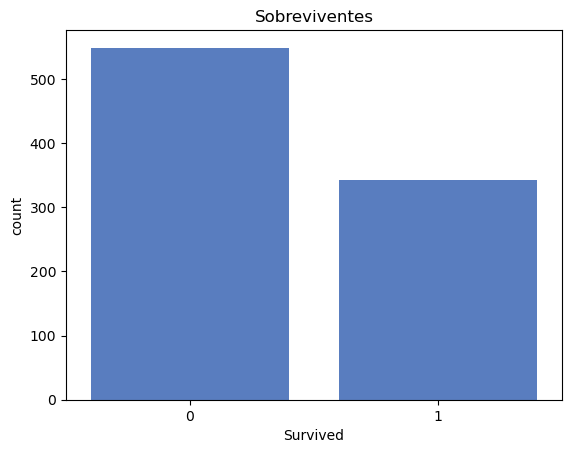

In [183]:
sns.set_palette("muted")

sns.countplot(x='Survived', data=df_train)
plt.title('Sobreviventes')
plt.show()

É possível verificar que 61,61% das pessoas não sobreviveram e 38.38% das pessoas sobreviveram 

In [186]:
df_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

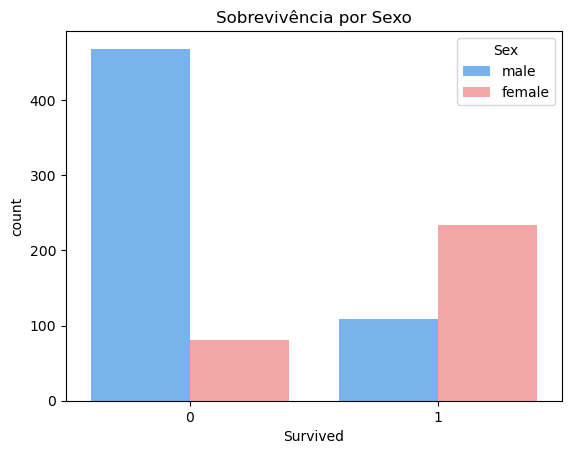

In [188]:
sns.countplot(x='Survived', hue='Sex', data=df_train, palette=['#66b3ff', '#ff9999'])
plt.title('Sobrevivência por Sexo')
plt.show()

Essa distribuição apresenta que as mulheres tiveram mais chance de sobrevivência do que os homens.

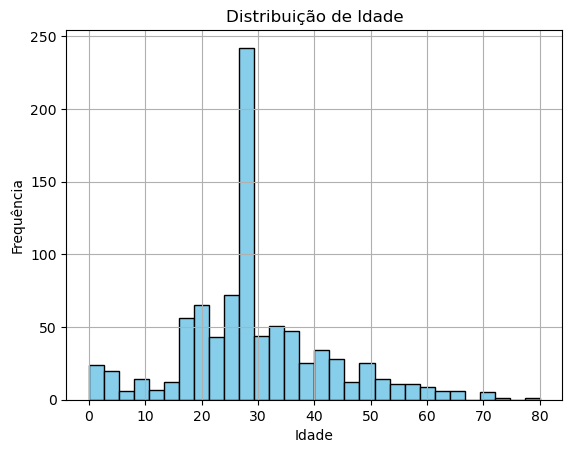

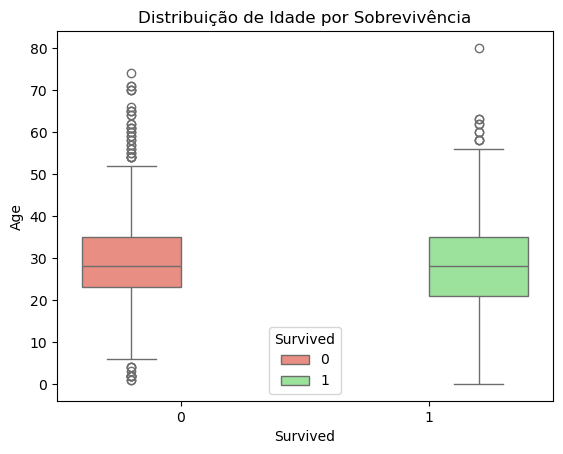

In [82]:
df_train['Age'].hist(bins=30, edgecolor='black', color='skyblue')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

sns.boxplot(x='Survived', y='Age', hue='Survived', data=df_train, palette={'lightgreen', 'salmon'}, dodge=True)
plt.title('Distribuição de Idade por Sobrevivência')
plt.show()

- A maioria dos passageiros tem entre 20 e 35 anos.
- Há uma presença considerável de crianças e adolescentes (de 0 a 10 anos) e um número menor de passageiros idosos (acima de 55 anos).
- A distribuição indica uma leve tendência de pessoas mais jovens terem tido mais chances de sobrevivência, mas com sobreposição suficiente para sugerir que a idade não era o único fator determinante

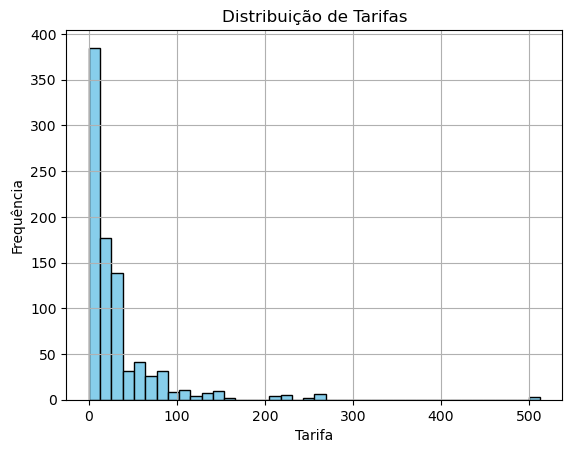

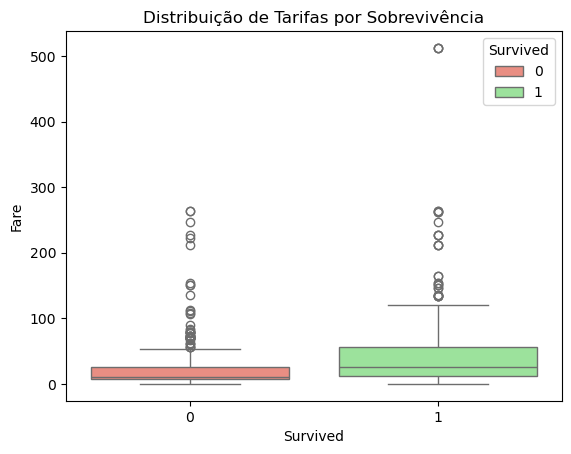

In [86]:
df_train['Fare'].hist(bins=40, edgecolor='black', color='skyblue')
plt.title('Distribuição de Tarifas')
plt.xlabel('Tarifa')
plt.ylabel('Frequência')
plt.show()

sns.boxplot(x='Survived', y='Fare', hue='Survived', data=df_train, palette={'lightgreen', 'salmon'})
plt.title('Distribuição de Tarifas por Sobrevivência')
plt.show()

- A maioria das tarifas está concentrada abaixo de 80 unidades, com um pico alto logo abaixo de 10 unidades.
- A tarifa acima de 100 e até 500 ocorre, mas é mais raro, ou seja, poucas pessoas pagaram tarifas mais altas. A maioria dos passageiros pagou tarifas baixas, e há uma pequena quantidade de outliers com tarifas muito elevadas.
- Os passageiros que pagaram tarifas mais altas tendem a ter uma taxa de sobrevivência maior. Isso pode ter relação com o fato de que tarifas mais altas provavelmente são das classes mais altas no navio, onde os passageiros podem ter tido acesso mais fácil ao resgate.
- A concentração de passageiros que pagaram tarifas baixas indica que a classe econômica (3ª classe) enfrentou mais dificuldades durante o desastre.

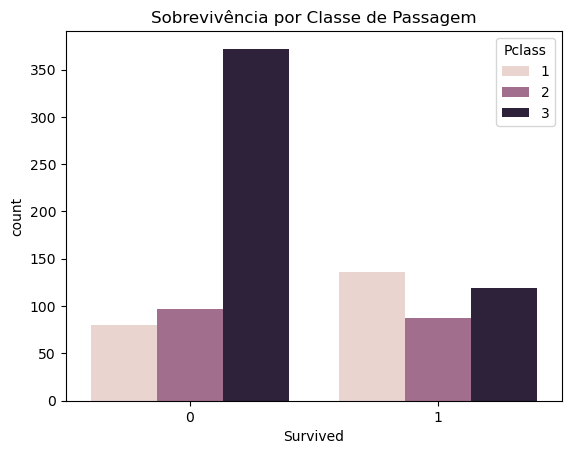

In [88]:
df_train['Pclass'].value_counts()

sns.countplot(x='Survived', hue='Pclass', data=df_train)
plt.title('Sobrevivência por Classe de Passagem')
plt.show()

- Na distribuição, pode-se confirmar que a 3ª classe foi a mais atingida no acidente, com uma quantidade bem superior as outras de não sobreviventes, já referente a sobreviventes, vemos que a 1ª classe foi priorizada no resgate e postriormente a 2ª classe.

In [90]:
df_train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

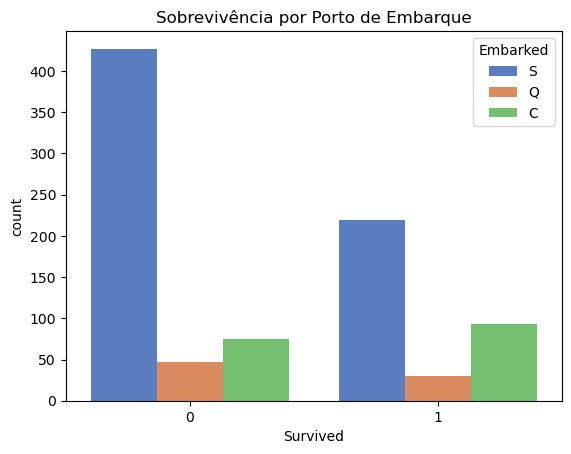

In [92]:
palette = {'lightblue', 'salmon', 'lightgreen'}

sns.countplot(x='Survived', hue='Embarked', data=df_train)
plt.title('Sobrevivência por Porto de Embarque')
plt.show()

- O maior ponto de embarque foi o ponto S, sendo assim analisando a localização de onde cada passageiro embarcou, é possível identificar que a maioria dos passageiros que não sobreviveram (mais de 400 pesssoas) embarcaram no ponto S e uma menor quantidade embarcaram nos pontos C e Q.
- Em contrapartida, verificando os passageiros que sobreviveram a maioria também embarcou no ponto S, embora a quantidade de sobreviventes seja bem menor do que de não sobreviventes.

Com base nos gráficos e distribuições analisadas, podemos tirar algumas conclusões sobre os dados:

- Há uma correlação entre o sexo e a sobrevivência, com uma maior proporção de mulheres sobrevivendo em comparação aos homens.
- Os passageiros da 1ª classe parecem ter maior taxa de sobrevivência em comparação àqueles das 3ª classe.
- A idade pode ter influenciado a sobrevivência de forma limitada, com passageiros mais jovens apresentando uma ligeira vantagem. 
- Tarifas mais altas estão associadas a uma maior chance de sobrevivência, com mais acesso ao resgate.
- Passageiros com famílias a bordo têm taxas de sobrevivência menores dos que viajavam sozinhos.
- O maior ponto de embarque e de não sobreviventes foi o ponto S, porém ele também teve a maior taxa de sobreviventes.

## Machine Learning

In [191]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [193]:
print('Dados de treino', df_train.shape)
print('- Features(TREINO): {}'.format(df_train.columns))
print('\n')
print('Dados de teste', df_test.shape)
print('- Features(TESTE): {}'.format(df_test.columns))

Dados de treino (891, 12)
- Features(TREINO): Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Dados de teste (418, 11)
- Features(TESTE): Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [195]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.92,Unknown,S


In [201]:
remove_columns = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df_train = df_train.drop(columns=remove_columns)

In [203]:
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Pré-Processamento

#### Checando o balanceamento das classes

In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 52.3+ KB


In [205]:
list_cols_to_str = ['Pclass', 'Sex', 'Embarked']
list_cols_to_int = ['Age', 'SibSp', 'Parch']

for data in list_cols_to_str:
    df_train[data] = df_train[data].astype(str)

for data in list_cols_to_int:
    df_train[data] = df_train[data].astype(int)

In [207]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int32  
 5   Parch     891 non-null    int32  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(1), int32(3), int64(1), object(3)
memory usage: 45.4+ KB


In [209]:
df_train['Survived'].value_counts(normalize=True).round(2)

Survived
0    0.62
1    0.38
Name: proportion, dtype: float64

In [211]:
target = 'Survived'
X, y = df_train.loc[:, df_train.columns != target], df_train.loc[:,target]

#### Split dos dados de treino x teste

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Transformação de Features

In [236]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['Age','SibSp','Parch','Fare']),
        ('cat', categorical_transformer, ['Pclass', 'Sex', 'Embarked'])

])

In [219]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(score_func=f_classif, k=5)),
    ('model_clf', LogisticRegression(random_state=42, ))
])

#### Fit do Modelo

In [224]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('selector', SelectKBest(k=5)),
                ('model_clf', LogisticRegression(random_state=42))])

#### Previsões (baseline)

In [227]:
predictions = pipeline.predict(X_test)

### Métricas das previsões

In [230]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
auc = roc_auc_score(y_test, predictions)

print(f"Acurácia: {accuracy:.2f}")
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'AUC-ROC: {auc:.2f}')

Acurácia: 0.78
Precisão: 0.73
Recall: 0.67
F1-Score: 0.70
AUC-ROC: 0.76


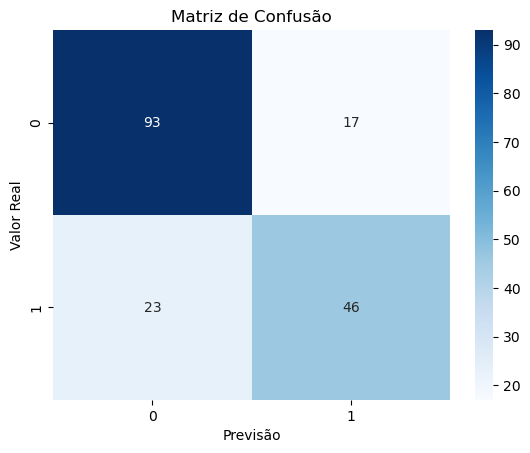

In [232]:
confusion = confusion_matrix(y_test, predictions)

sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

- 78% das previsões do modelo estão corretas. A acurácia é razoável, mas pode não refletir totalmente o desempenho.
- Com uma precisão de 73%, o modelo identifica corretamente 73% das previsões positivas. Isso indica que, entre todas as previsões de classe positiva, 73% estão corretas.
- O recall de 67% mostra que o modelo captura 67% dos verdadeiros casos positivos, ou seja, 33% dos casos positivos reais estão sendo perdidos, sendo assim o modelo pode estar gerando uma quantidade moderada de falsos negativos.
- O F1-score de 70% indica um equilíbrio razoável entre precisão e revocação, já que o F1 é a média harmônica dessas duas métricas.
- Uma AUC-ROC de 0.76 indica que o modelo tem uma boa capacidade de distinguir entre as classes positivas e negativas, considerando que uma AUC de 0.5 seria equivalente ao acaso e uma AUC de 1.0 seria uma separação perfeita.
- Matriz de Confusão: A matriz de confusão mostra que o modelo tem um desempenho razoável, mas ainda comete alguns erros, especialmente em prever sobreviventes incorretamente (falsos negativos).


#### Ajustando hiperparâmetros

In [238]:
model = LogisticRegression(random_state=42, max_iter=1000) 

param_grid = [
    {'model_clf__penalty': ['l1', 'l2'],
     'model_clf__C': [0.01, 0.1, 1, 10, 100],
     'model_clf__solver': ['liblinear']},

    {'model_clf__penalty': ['l1', 'l2', 'elasticnet'],
     'model_clf__C': [0.01, 0.1, 1, 10, 100],
     'model_clf__solver': ['saga'],
     'model_clf__l1_ratio': [0, 0.5, 1]},   
]

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Melhores hiperparâmetros:", grid_search.best_params_)
print("Melhor Acurácia:", grid_search.best_score_)

Melhores hiperparâmetros: {'model_clf__C': 1, 'model_clf__penalty': 'l1', 'model_clf__solver': 'liblinear'}
Melhor Acurácia: 0.7865655471289273


In [246]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
auc = roc_auc_score(y_test, predictions)

print(f"Acurácia: {accuracy:.2f}")
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'AUC-ROC: {auc:.2f}')

Acurácia: 0.78
Precisão: 0.73
Recall: 0.67
F1-Score: 0.70
AUC-ROC: 0.76


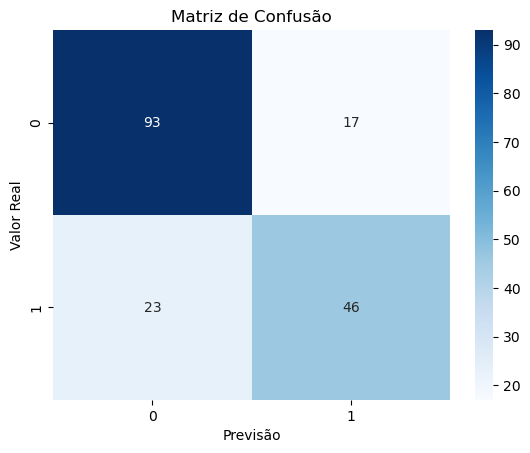

In [248]:
confusion = confusion_matrix(y_test, predictions)

sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()